In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dt=pd.read_csv("E:\Data Science(Ineuron)\Interview\Green Avni Solutions\Data Set 2\AEP_hourly.csv")

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [4]:
dt.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [5]:
dt.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


### Separating date and time

In [6]:
dt["Date"]=pd.to_datetime(dt["Datetime"]).dt.date
dt["Time"]=pd.to_datetime(dt["Datetime"]).dt.time

In [7]:
dt=dt.drop("Datetime",axis=1)

In [8]:
dt.head()

,AEP_MW,Date,Time
0,13478.0,2004-12-31,01:00:00
1,12865.0,2004-12-31,02:00:00
2,12577.0,2004-12-31,03:00:00
3,12517.0,2004-12-31,04:00:00
4,12670.0,2004-12-31,05:00:00


In [9]:
dt.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   AEP_MW  121273 non-null  bool 
 1   Date    121273 non-null  bool 
 2   Time    121273 non-null  bool 
dtypes: bool(3)
memory usage: 355.4 KB


<AxesSubplot:>

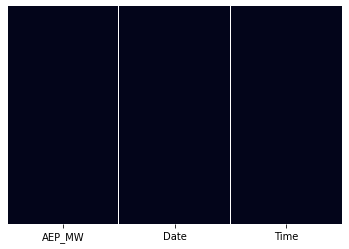

In [10]:
sns.heatmap(dt.isnull(),yticklabels=False,cbar=False)

### Maximum consumption

In [11]:
dt[dt["AEP_MW"]==dt["AEP_MW"].max()]

,AEP_MW,Date,Time
30221,25695.0,2008-10-20,14:00:00


### Minimum Consumption

In [12]:
dt[dt["AEP_MW"]==dt["AEP_MW"].min()]

,AEP_MW,Date,Time
100759,9581.0,2016-10-02,05:00:00


### Ploting And Visualization

C:\Users\Amal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AEP_MW'>

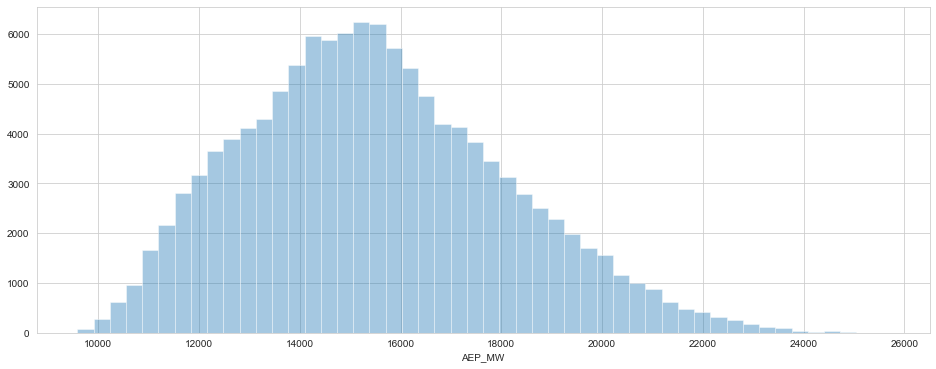

In [13]:
plt.figure(figsize=(16,6))
sns.set_style("whitegrid")
sns.distplot(dt["AEP_MW"],kde=False)

### How many years are unique

In [14]:
dt["Year"]=pd.DatetimeIndex(dt["Date"]).year

In [15]:
dt.head()

,AEP_MW,Date,Time,Year
0,13478.0,2004-12-31,01:00:00,2004
1,12865.0,2004-12-31,02:00:00,2004
2,12577.0,2004-12-31,03:00:00,2004
3,12517.0,2004-12-31,04:00:00,2004
4,12670.0,2004-12-31,05:00:00,2004


In [16]:
dt["Year"].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018], dtype=int64)

### Energy V/s Year

<AxesSubplot:xlabel='Year', ylabel='AEP_MW'>

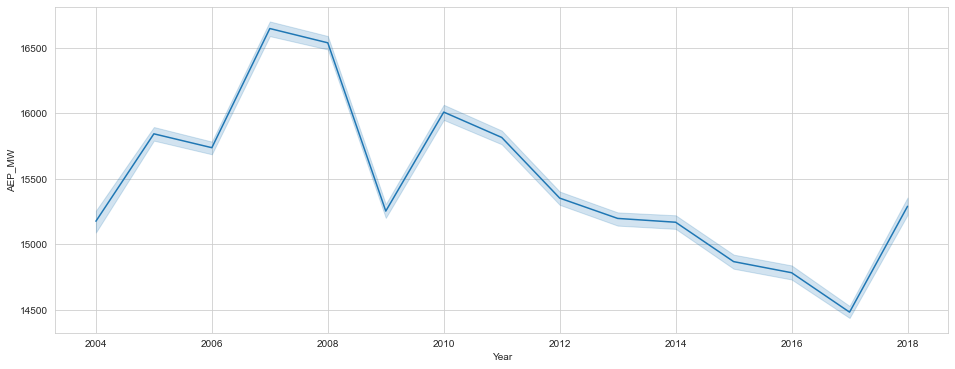

In [17]:
plt.figure(figsize=(16,6))
sns.lineplot(x="Year",y="AEP_MW",data=dt)

### Regression

<Figure size 720x720 with 0 Axes>

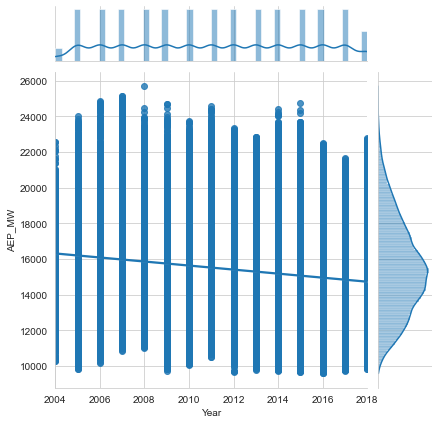

In [18]:
plt.figure(figsize=(10,10))
sns.jointplot(x=dt["Year"],y=dt["AEP_MW"],data=dt,kind="reg")

In [19]:
dt[dt["Year"]==2013].nunique()

AEP_MW    5601
Date       365
Time        24
Year         1
dtype: int64

### Energy v/s Time

<AxesSubplot:xlabel='Time'>

<Figure size 1440x576 with 0 Axes>

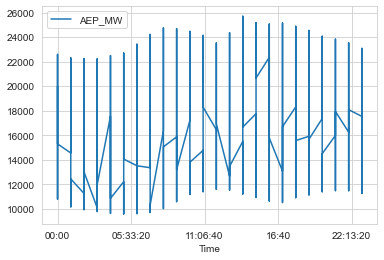

In [20]:
plt.figure(figsize=(20,8))
dt.plot(kind='line',x="Time",y="AEP_MW")